In [0]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [0]:
x = pd.read_csv('x.csv').drop(['worldwide_gross', 'gross'],axis=1)

# **Correlacion de los features**

---



In [3]:
# Matriz de correlacion
x.corr()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765
duration.1,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000


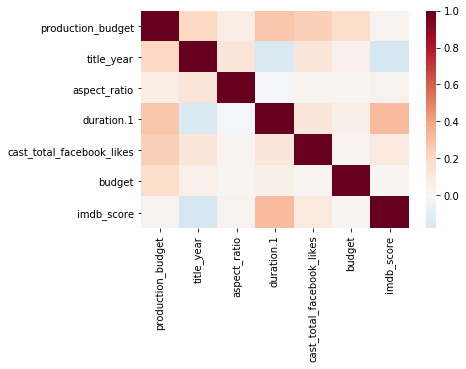

In [4]:
# sns.heatmap (mapa de calor):
# colorea segun que tan altos son los valores con respecto al maximo y minimo
sns.heatmap(x.corr(), center=0, cmap='RdBu_r');

Matriz con valores cercanos a 0 -> features son suficientemente independientes entre si

# **Analisis exploratorio**

---


In [0]:
X = pd.read_csv('x.csv').drop('gross', axis=1)

y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [7]:
x_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
838,50000000.0,1994.0,1.85,123.0,25697.0,60000000.0,7.6
3837,1000000.0,2003.0,1.85,79.0,2489.0,1000000.0,6.1
3237,5000000.0,2014.0,1.85,93.0,1410.0,5000000.0,6.1
2830,10000000.0,2001.0,1.85,85.0,700.0,10000000.0,7.3
3761,1250000.0,1945.0,1.37,101.0,581.0,1250000.0,8.0


In [0]:
model = Lasso().fit(x_train, y_train)

In [9]:
model.score(x_test, y_test)

0.5978163742221317

In [10]:
model.coef_ # Coeficientes de la regresion del modelo

array([ 3.04940275e+00, -1.62551089e+05, -6.40496731e+06, -1.53791881e+04,
        2.00779763e+02, -3.91959806e-02,  2.61670231e+07])

In [0]:
var = np.floor(np.log10(np.abs(model.coef_)))

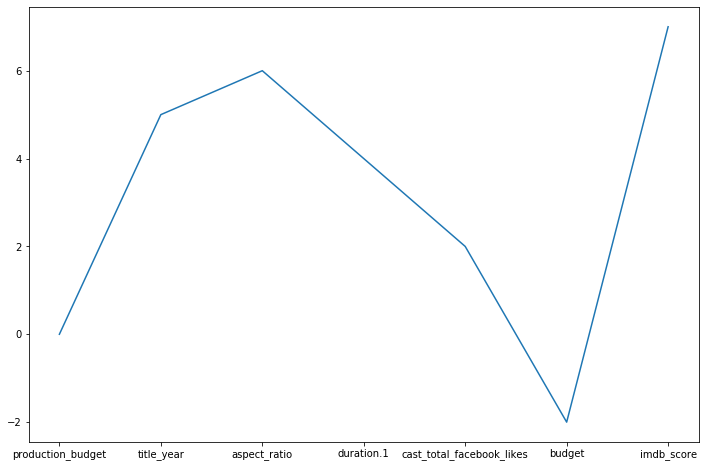

In [12]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

Esto nos ayuda a seleccionar los features a eliminar

# **Correlacion**

---



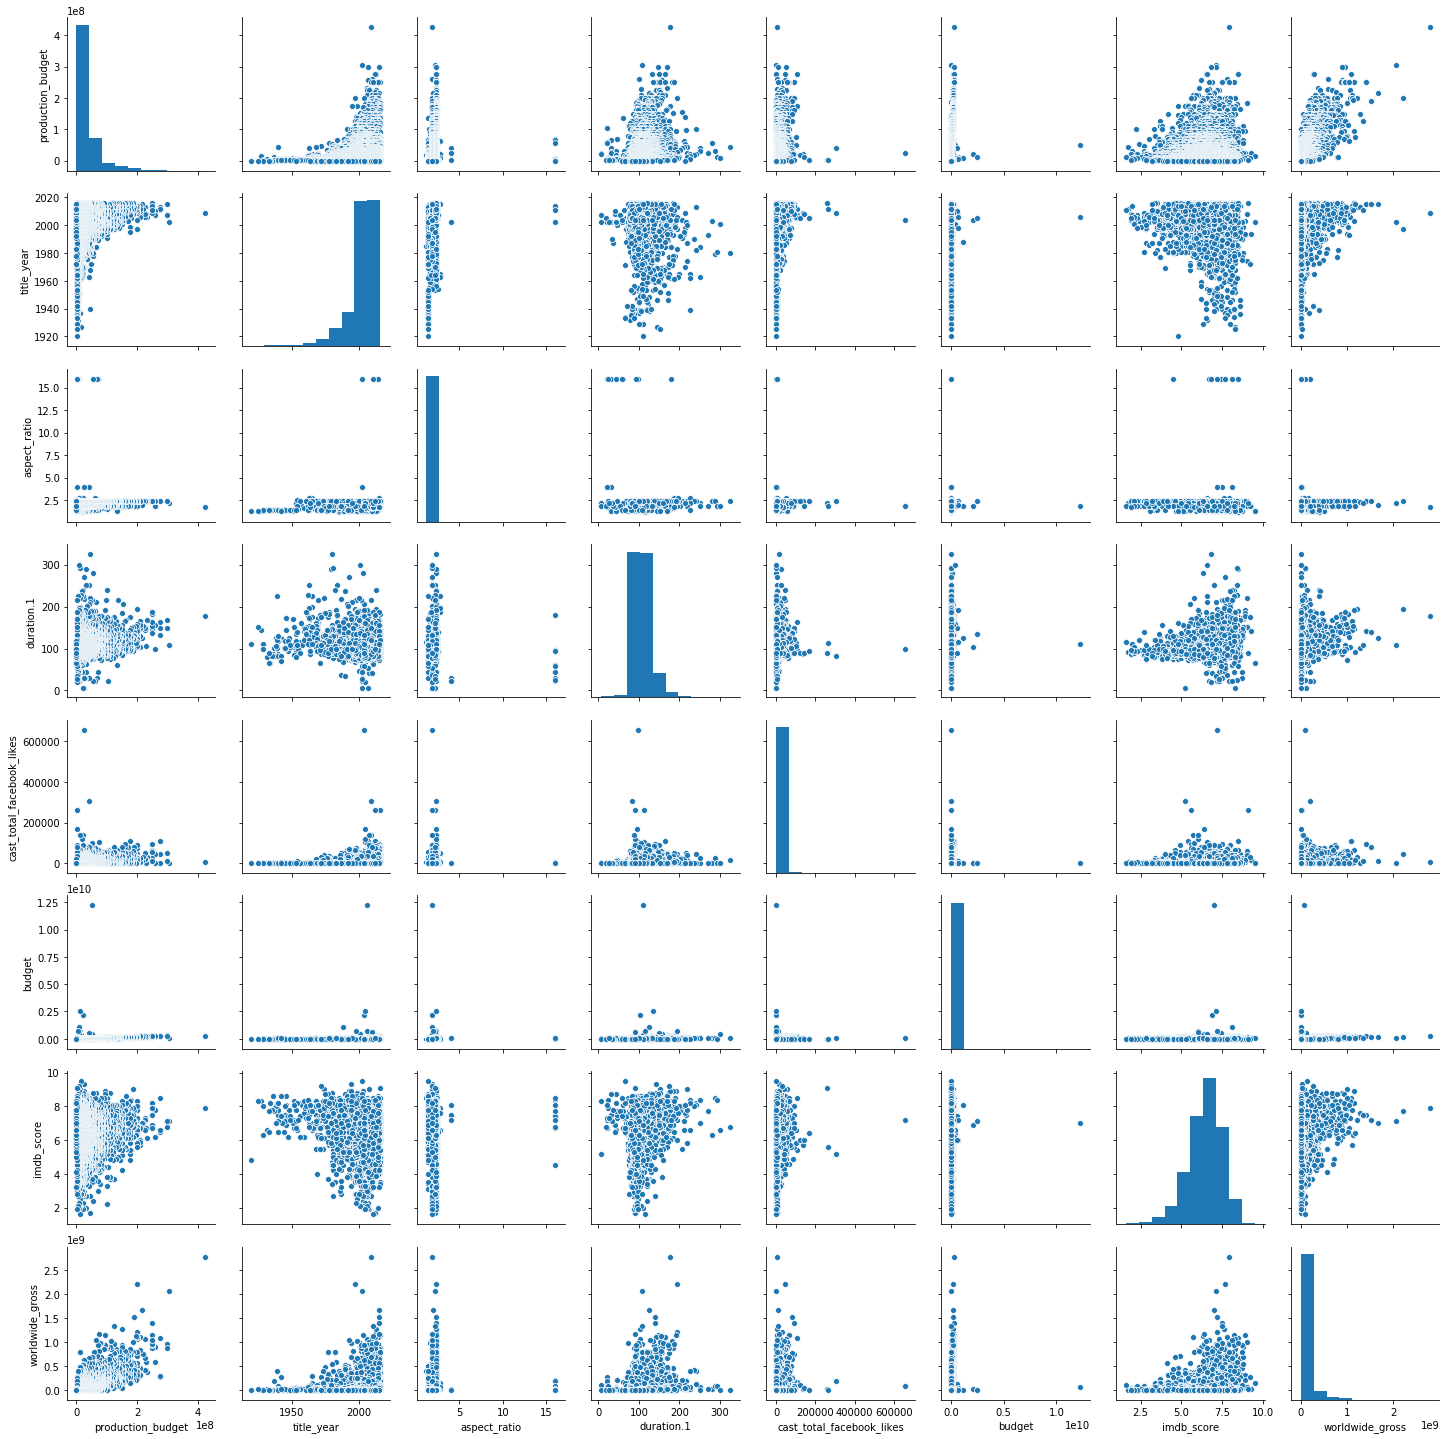

In [13]:
z = pd.concat([X, y], axis=1)
sns.pairplot(z)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


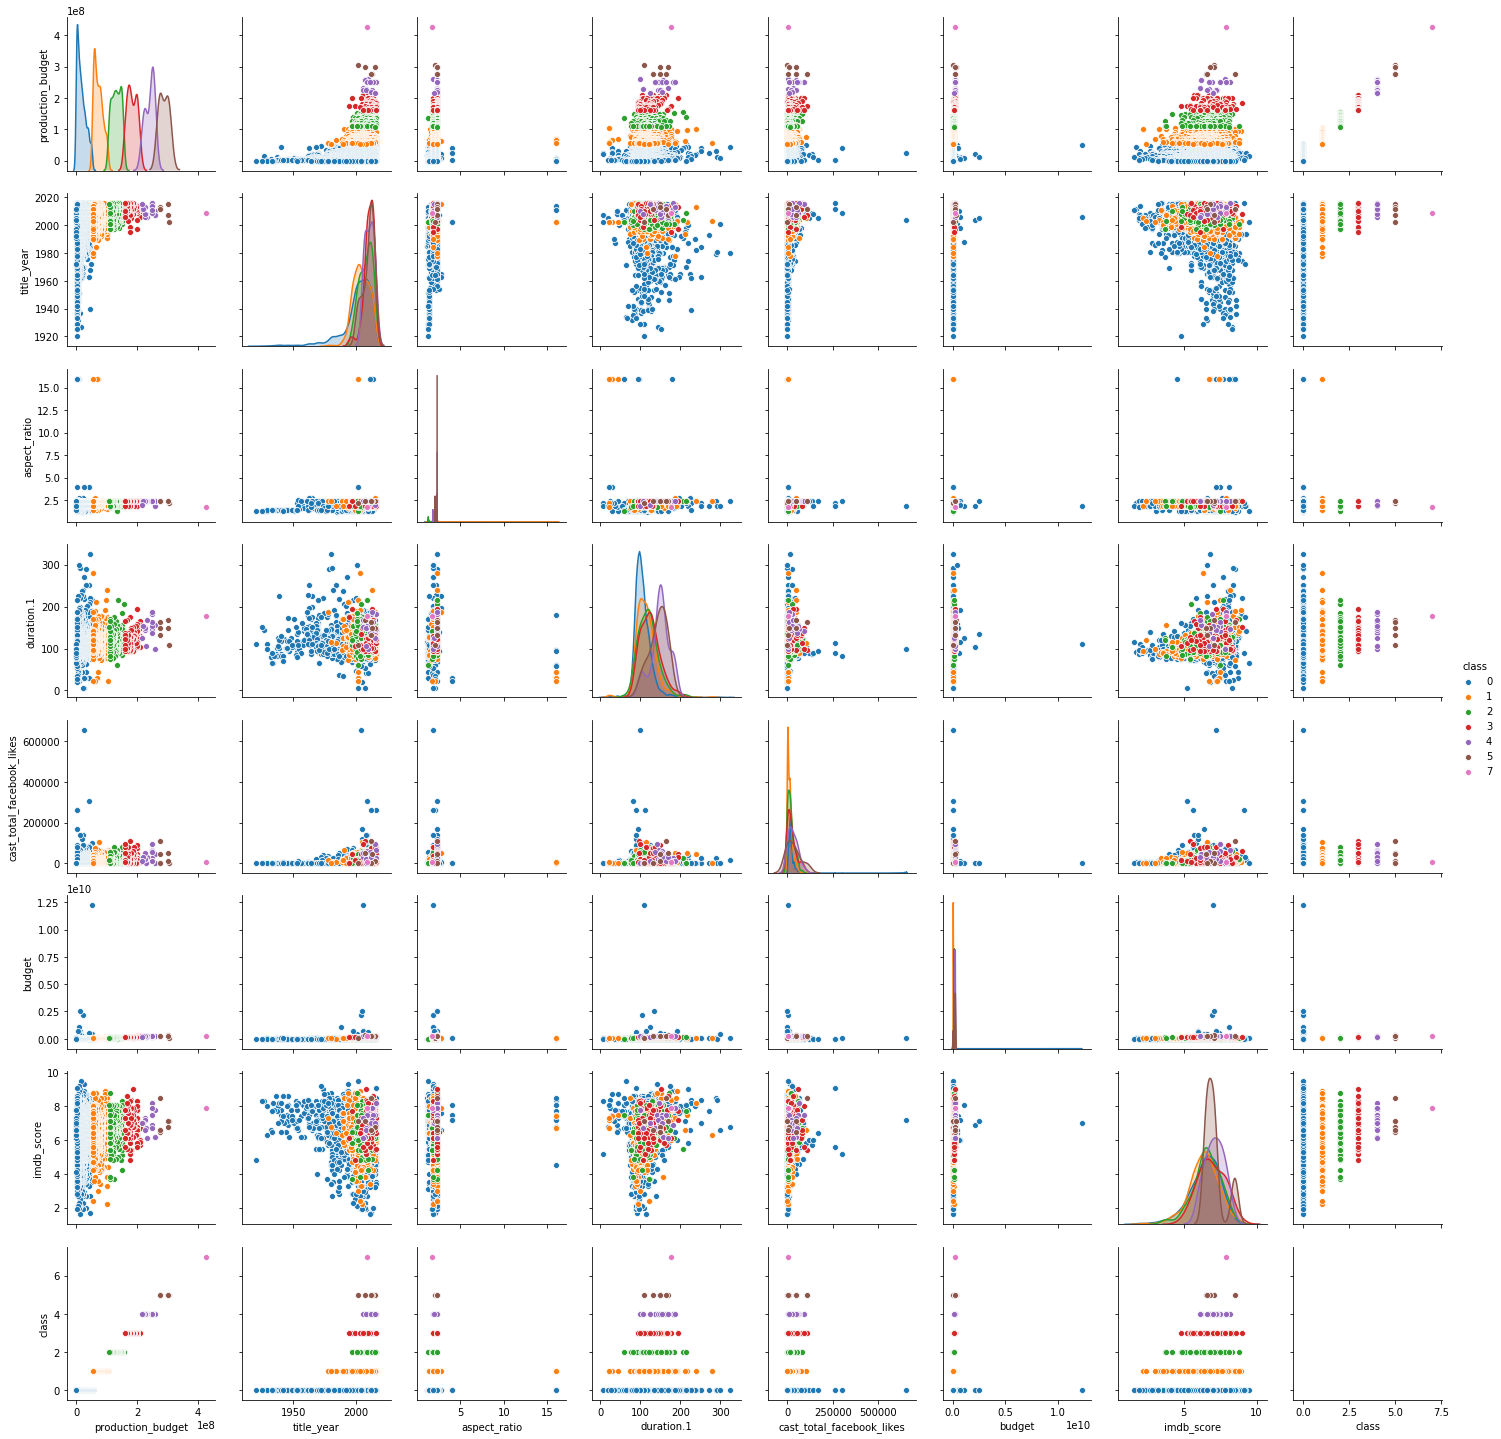

In [14]:
classes = pd.cut(X['production_budget'], 8).cat.codes.rename('class')
z2 = pd.concat([X, classes], axis=1)

sns.pairplot(z2, hue='class');

**Continuacion del analisis exploratorio**

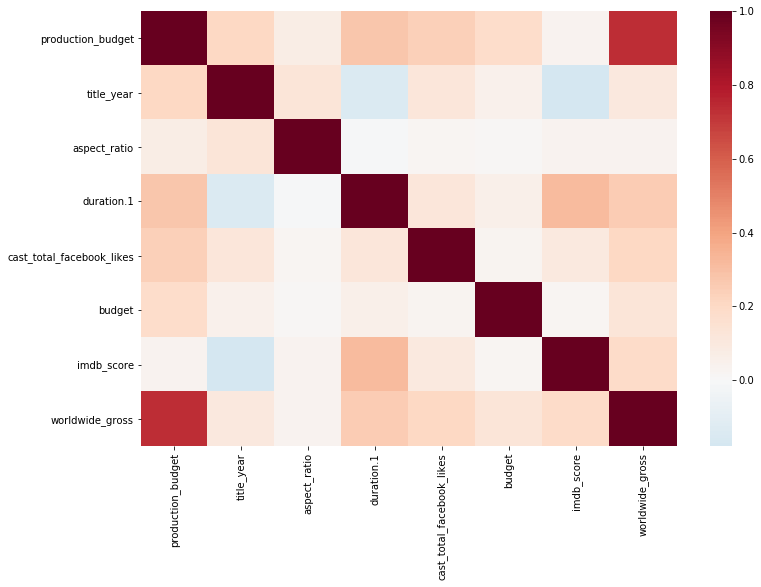

In [15]:
z3 = pd.concat([X, y], axis=1)
sns.heatmap(z3.corr(), center=0, cmap='RdBu_r')
plt.show()

Esto nos ayuda a seleccionar los features mas importantes

# **Métodos de selección automática de features**

---



In [0]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
# SelectKBest: Selecciona los k mejores features
# mutual_info_regression: metrica para ver que tanto aporta un feature

In [0]:
selector = SelectKBest(mutual_info_regression, k=4)

In [22]:
selector.fit(X, y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f75227e8378>)

In [25]:
scores = selector.scores_
scores

array([0.42839228, 0.06436408, 0.0743866 , 0.07134372, 0.11820076,
       0.37995828, 0.04524452])

([<matplotlib.axis.XTick at 0x7f7523d5e978>,
 <a list of 7 Text xticklabel objects>)

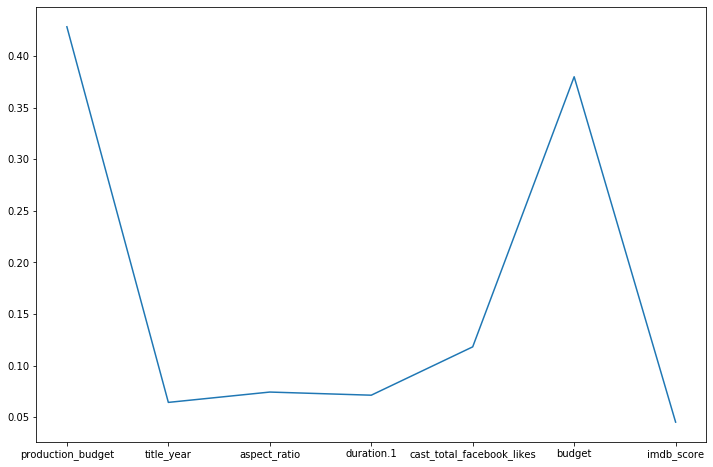

In [30]:
plt.plot(scores)
plt.xticks(np.arange(len(X.columns)), X.columns)

Los features mas importantes fueron
- production_budget
- cast_total_facebook_likes
- imdb_score

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [0]:
# Probar con 3 y 5 features
cols_X3 = ['production_budget','cast_total_facebook_likes','imdb_score']
cols_X5 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']

X3 = X[cols_X3]
X5 = X[cols_X5]

X3_train, X3_test, Y3_train, Y3_test = X_train[cols_X3], X_test[cols_X3], Y_train, Y_test
X5_train, X5_test, Y5_train, Y5_test = X_train[cols_X5], X_test[cols_X5], Y_train, Y_test

In [40]:
model_X = Lasso().fit(X_train, Y_train)
model_X3 = Lasso().fit(X3_train, Y3_train)
model_X5 = Lasso().fit(X5_train, Y5_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.569220065862562e+18, tolerance: 9201304074721036.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.072881684817203e+18, tolerance: 9201304074721036.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.499652559145083e+18, tolerance: 9201304074721036.0
  positive)


In [42]:
print(model_X.score(X_test, Y_test))
print(model_X3.score(X3_test, Y3_test))
print(model_X5.score(X5_test, Y5_test))

0.5691733101095255
0.568166743076773
0.5681265738588395
